In [1]:
from keras.datasets import mnist
from keras.layers import Input, Dense
from keras.models import Model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

Using TensorFlow backend.
C:\Users\hp\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\hp\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\hp\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\hp\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: Future

In [2]:
(X_train, _), (X_test, _) = mnist.load_data()

X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

X_train = X_train.reshape(len(X_train), np.prod(X_train.shape[1:]))
X_test = X_test.reshape(len(X_test), np.prod(X_test.shape[1:]))
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [3]:
input_img= Input(shape=(784,))

In [4]:
#input image will be encoded to 32 units
encoded = Dense(units=32, activation='relu')(input_img)

In [5]:
decoded = Dense(units=784, activation='sigmoid')(encoded)

In [6]:
#creating the autoencoder with input as the input image and output as the decoder
autoencoder=Model(input_img, decoded)

In [7]:
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_2 (Dense)              (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


In [9]:
#Compiling the autoencoder model with adadelta optimizer
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy', metrics=['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [11]:
#Train the autoencoder using the training data
autoencoder.fit(X_train, X_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(X_test, X_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 32us/step - loss: 0.1022 - accuracy: 0.8136 - val_loss: 0.1006 - val_accuracy: 0.8127
Epoch 2/10
60000/60000 [==============================] - 2s 34us/step - loss: 0.1019 - accuracy: 0.8136 - val_loss: 0.1002 - val_accuracy: 0.8127
Epoch 3/10
60000/60000 [==============================] - 2s 30us/step - loss: 0.1016 - accuracy: 0.8136 - val_loss: 0.0999 - val_accuracy: 0.8128
Epoch 4/10
60000/60000 [==============================] - 2s 31us/step - loss: 0.1014 - accuracy: 0.8136 - val_loss: 0.0997 - val_accuracy: 0.8128
Epoch 5/10
60000/60000 [==============================] - 2s 33us/step - loss: 0.1011 - accuracy: 0.8137 - val_loss: 0.0994 - val_accuracy: 0.8128
Epoch 6/10
60000/60000 [==============================] - 2s 34us/step - loss: 0.1008 - accuracy: 0.8137 - val_loss: 0.0992 - val_accuracy: 0.8128
Epoch 7/10
60000/60000 [==============================] - 2s 30us/st

In [12]:
#Fitting the test data on encoder and autoencoder to view the encoded images and reconstructed images 
encoded_imgs = encoder.predict(X_test)
predicted = autoencoder.predict(X_test)

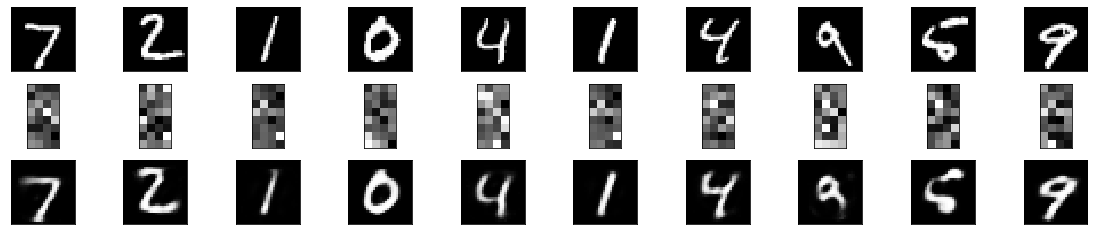

In [13]:
plt.figure(figsize=(40, 4))
for i in range(10):
    # display original
    ax = plt.subplot(3, 20, i + 1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display encoded image
    ax = plt.subplot(3, 20, i + 1 + 20)
    plt.imshow(encoded_imgs[i].reshape(8,4))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    # display reconstruction
    ax = plt.subplot(3, 20, 2*20 +i+ 1)
    plt.imshow(predicted[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    
    
plt.show()